## What users are talking about at Hacker News? 

The objective of this projects is to look into Hacker News posts titles to identify the most common topics that users are posting, liking and talking about. 

There are four questions answered in this notebook:  
- What are the most common topics on Hacker News about?
- What are the most popular posts on Hacker News about?
- What are the most commented posts on Hacker News about?
- Is there difference in average amount of comments and points for posts created at different time of a day and day of a week? And is this difference the same for all types of posts? 



In [1]:
# import libraries used in the project:
import csv
import datetime as dt
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import string

## Open and explore dataset

In [2]:
# open the hacker_news.csv file
f = open('hacker_news.csv')

#parse the data from the file
reader = csv.reader(f)

# convert data into a list of lists format
hn = list(reader)

In [3]:
# check length of dataset:
len(hn)

293120

In [4]:
# extract header from data and assign it to variable headers:
headers = hn[0]
print("Headers:", headers)

Headers: ['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']


In [5]:
# remove headers from hn:
hn = hn[1:]

#print first and last 5 rows of dataset:
print("HN first row", hn[1:5])

HN first row [['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24'], ['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19'], ['12578989', 'algorithmic music', 'http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext', '1', '0', 'poindontcare', '9/26/2016 3:16'], ['12578979', 'How the Data Vault Enables the Next-Gen Data Warehouse and Data Lake', 'https://www.talend.com/blog/2016/05/12/talend-and-Â\x93the-data-vaultÂ\x94', '1', '0', 'markgainor1', '9/26/2016 3:14']]


According to documentation: this data set is Hacker News posts from the last 12 months (up to September 26 2016).  
Lets check the exact amount of days, weeks and hours in dataset:

In [6]:
#create empty list of dates
dates =[]

# itterate over dataset and convert each create_at into 'datetime.datetime' class.
for row in hn:
    d = dt.datetime.strptime(row[6],"%m/%d/%Y %H:%M" )
    #append each create_at to dates list:
    dates.append(d)

# sort dates using sorted():
sorted_dates = sorted(dates)

In [7]:
# find how many days are in dataset:
days = (sorted_dates[-1].date()- sorted_dates[0].date()).days
print("Days:", days)
# find how many weeks are in dataset:
weeks = days/7
print("Weeks:", weeks)


Days: 386
Weeks: 55.142857142857146


the dataset contains 386 days of data, that is more than 55 fuul weeks. To have unbiased data while looking into data by week and hour, lets cut out one day from dataset, so that only 385 and full 55 weeks of data remains in dataset:

In [8]:
# calculate dateand time that is exactly 385 days away from last date in dataset, and name it as last_datetime:
last_datetime = sorted_dates[-1] -  dt.timedelta(days=385)
print(last_datetime)

2015-09-07 03:26:00


In [9]:
# create new dataset hn_new that only contains posts older than last_datetime:
hn_new = []

for row in hn:
    d = dt.datetime.strptime(row[6],"%m/%d/%Y %H:%M" )
    if d >= last_datetime:
        hn_new.append(row)      

In [10]:
# check current oldest date of initial dataset:
print("Initial dataset")
print("first row of dataset:", hn[0] )
print("last row of dataset:", hn[-1] )
print("-------------------------------")
print("Current dataset")
# check if last date of new dataset: 
print("first row of dataset:", hn_new[0] )
print("last row of dataset:", hn_new[-1])

Initial dataset
first row of dataset: ['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26']
last row of dataset: ['10176903', 'Toyota Establishes Research Centers with MIT and Stanford for AI Research', 'http://newsroom.toyota.co.jp/en/detail/9233109/', '4', '0', 'tim_sw', '9/6/2015 5:50']
-------------------------------
Current dataset
first row of dataset: ['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26']
last row of dataset: ['10179951', 'Fast Memory Copy (1996)', 'http://now.cs.berkeley.edu/Td/bcopy.html', '6', '1', 'userbinator', '9/7/2015 3:32']


As can be seen above current dataset contains exactly 385 full days.

## What are the most common topics on Hacker News about?

To identify the most common topics in Hacker News posts lets look at words that are used in titles and create a dictionary that will have 'words' as keys and counts as items:

In [11]:
# clean titles and split them in separate words:
#-------------------------------------------------------
# create empty list of words:
words= []

# for each row in dataset:
for row in hn_new:
    #assign the title in each post to variable called title:
    title = row[1]
    #remove punctuations and split title into separate words:
    for c in string.punctuation:
        title = title.replace(c," ")
        splited_title = title.split(" ")
        
    #convert all words into lower case and append to list words:    
    for word in splited_title:
        word = word.lower()
        words.append(word)       
            

In [12]:
# create dictionary that will show how many times each word is mentioned in posts:
#-----------------------------------------------------------------------------------
#create empty dictionary:
count_dictionary = {}

# for each word in words list:
for word in words:
    # check if word already in dictionary, and if yes, append 1 to count:
    if word in count_dictionary.keys():
        #add points to the word in count_dictionary:
        count_dictionary[word] +=1
    # if not, add this word in discionary with count =1:    
    else:
        count_dictionary[word] = 1
   

#### top 50 words in count_dictionary:

In [13]:
# sort dictionary by counts and display top 50 words in count_dictionary:
sorted(count_dictionary.items(), reverse = True, key = lambda x: x[1] )[:50]


[('', 224779),
 ('the', 74174),
 ('to', 55112),
 ('a', 48429),
 ('of', 42492),
 ('and', 37499),
 ('in', 37011),
 ('for', 36199),
 ('is', 21140),
 ('hn', 20251),
 ('on', 19906),
 ('with', 19192),
 ('s', 18793),
 ('how', 18052),
 ('your', 12989),
 ('you', 11565),
 ('show', 10750),
 ('new', 10118),
 ('from', 9886),
 ('ask', 9575),
 ('what', 9055),
 ('why', 8868),
 ('an', 8311),
 ('are', 7554),
 ('it', 7091),
 ('data', 6874),
 ('by', 6709),
 ('i', 6550),
 ('at', 6496),
 ('that', 6196),
 ('google', 6174),
 ('be', 5336),
 ('app', 5306),
 ('can', 5214),
 ('as', 5178),
 ('about', 4927),
 ('open', 4665),
 ('do', 4616),
 ('using', 4612),
 ('1', 4444),
 ('we', 4424),
 ('not', 4381),
 ('web', 4350),
 ('2', 4183),
 ('apple', 4176),
 ('its', 4142),
 ('will', 4128),
 ('first', 3962),
 ('startup', 3895),
 ('code', 3814)]

It can be concluded that most common significant words in count_dictionary are: hn - abbreviation for Haker News, show, new, ask, data, google, app, us (probably most mean - US rather than us (can be investigated further, but not a topic for this project), web, startup. 

#### Posts' topics chosen for further research:
1. Ask HN and Show HN posts:
It is not surprising that HN, Ask and Show words appear as most common.   
Ask HN and Show HN posts are standard posts for Haker News in which users ask the Hacker News community a specific question or share some projects, product or in general some information. 
2. Post about Data.    
It is also interesting to investigate how many posts are about data science.
3. Posts about Google 


### Total amount of posts in Hacker News dataset for most frequent topics

In [14]:
# separate posts with Ask HN and Show HN types from other posts:
#-----------------------------------------------------------------
# create empty lists to store ask, show and other posts:
ask_posts = []
show_posts = []
other_posts = []

# for each row in dataset:
for row in hn_new:
    #assign the title in each post to variable called title:
    title = row[1]
    
    #if title has 'Ask HN' phrase in it, add it to ask_posts list:
    if 'Ask HN' in title:
        ask_posts.append(row)
    #if title has 'Show HN' phrase in it, add it to show_posts list:    
    elif 'Show HN' in title:
        show_posts.append(row)   
    #else add post to other_posts list:    
    else:
        other_posts.append(row)
    

In [15]:
print("Number of Ask HN posts:", len(ask_posts))
print("Number of Show HN posts:",len(show_posts))
print("Number of other posts:",len(other_posts))  

Number of Ask HN posts: 9111
Number of Show HN posts: 10148
Number of other posts: 273465


#### Conclusions about amount of Ask HN and Show HN posts on Hacker News:
1. Number of Ask HN and Show HN posts is 9111 and 10148. In dictionary above "ask" word had 9575 recordings and "show" word - 10750. It is not surprising as "ask" and "show" words are common in English language and can be used also for other purposes rather than Ask HN and Show HN posts.
2. About 3,1% of dataset is Ask HN posts (9111 out of 292724)
3. About 3,5% of dataset is Show HN posts (10148 out of 292724)


In [16]:
#check how often users are talking about topics related to data, science and data science:
#-------------------------------------------------------------------------------------------

#create empty lists to store posts about data, science and data_science :
data_posts=[]
data_science_posts=[]
data_science_list = ['data', 'scien']
science_posts = []
google_posts = []
startup_posts = []

#for each row in dataset:
for row in hn_new:
    #assign the title in each post to variable called title:
    title = row[1]
    #clean title to easier distinguish identify words:
    for c in string.punctuation:
        words= []
        title = title.replace(c," ")
        splited_title = title.split(" ")  
        for word in splited_title:
            word = word.lower()
            words.append(word)
            
    # join clean words from title back together:         
    words = ' '.join(words)        
    
    #if there are both 'data' and 'scien' in the title, append it to data_scince posts list:
    if all(word in words for word in data_science_list):
        data_science_posts.append(row)      
    #if there is word 'data' in title, append it to data_posts list:    
    if 'data' in words:
        data_posts.append(row)
    #if there is root 'scien' in title, append it to science_posts list:       
    if 'scien' in words:
        science_posts.append(row)
    #if there is word 'google' in title, append it to google_posts lists:
    if 'google' in words:
        google_posts.append(row)


In [17]:
print("Total amount of posts:", len(hn_new))
print("Number of posts about data:",len(data_posts))
print("Number of posts about data science:",len(data_science_posts))
print("Number of posts about science:",len(science_posts))


Total amount of posts: 292724
Number of posts about data: 8374
Number of posts about data science: 795
Number of posts about science: 3749


#### Conclusions about amount of Data posts on Hacker News:

1. From 3749 posts about science, 795 posts are about data science (around 21 % of all posts about science)   
2. From 292724 total posts on Hacker News 8374 are talking about data (around 2.9%). Also data is mentined in created dictionary among top 50 words (26th place) suggesting that it is very hot topic.
3. According to dictionary calculation 'data' word was mentioned 6874 times in post titles, and 8374 posts have 'data' as root-word in them. 

In [18]:
print("Number of posts about Google:",len(google_posts))


Number of posts about Google: 6435


#### Conclusions about amount of Google posts on Hacker News:
About 2,2% of dataset is Ask HN posts (6435 out of 292724)


## What are the most popular posts on Hacker News about?

To identify the most popular topics in Hacker News posts lets look at words that are used in titles and create a dictionary that will have 'words' as keys and points for each word as items:

In [19]:
# create dictionary that contains points received for this specific title:
# --------------------------------------------------------------------------------------------------------
# create empty dictionary:
points_dictionary ={}


#for each row in dataset:
for row in hn_new:
    #assign the title in each post to variable called title:
    words = []
    title = row[1]
    for c in string.punctuation:
        title = title.replace(c," ")
        splited_title = title.split(" ")
        
        #convert all words into lower case and append to list words:    
    for word in splited_title:
        word = word.lower()
        words.append(word)  
        
    for word in words:
            # check if word already in dictionary, and if yes, append 1 to count:
        if word in points_dictionary.keys():
            #add points to the word in count_dictionary:
            points_dictionary[word] += int(row[3])
        # if not, add this word in discionary with count =1:    
        else:
            points_dictionary[word] = int(row[3])

#### top 50 words in points_dictionary:

In [20]:
# sort dictionary by counts and display top 50 words in point_dictionary:
sorted(points_dictionary.items(), reverse = True, key = lambda x: x[1] )[:50]


[('', 3170352),
 ('the', 1042202),
 ('to', 769838),
 ('a', 768582),
 ('of', 618925),
 ('in', 537354),
 ('and', 482839),
 ('for', 479503),
 ('is', 352225),
 ('on', 284879),
 ('s', 274443),
 ('hn', 273839),
 ('how', 242274),
 ('with', 226955),
 ('show', 158249),
 ('from', 144286),
 ('why', 142820),
 ('i', 139136),
 ('new', 131743),
 ('an', 128824),
 ('your', 128478),
 ('you', 127452),
 ('what', 116110),
 ('google', 115060),
 ('are', 108446),
 ('ask', 107555),
 ('by', 104989),
 ('open', 102570),
 ('at', 95787),
 ('that', 94330),
 ('it', 93871),
 ('1', 83546),
 ('as', 80416),
 ('be', 78577),
 ('0', 77043),
 ('data', 75342),
 ('we', 75048),
 ('my', 74998),
 ('not', 74078),
 ('source', 74024),
 ('has', 70692),
 ('code', 68954),
 ('web', 66635),
 ('apple', 66053),
 ('2', 65821),
 ('about', 65363),
 ('its', 64146),
 ('do', 64005),
 ('now', 63345),
 ('can', 62478)]


Significant words are in top 50 points_list are :  
- hn, show, new, google, ask, open, data, code, web, apple.  

This list looks very similar to count_dictionary top 50 list that is not surprising, as the more posts related to ptopic is posted, the more total points this topic will get. 


But the question is: Did this topics recieve so many points because of quantity of posts or due to popularity among users? In order to understand the answer, average amount of points per post is calculated:

In [21]:
#Find the total number of points in ask and show posts:
#--------------------------------------------------------
#initialize variables:
total_ask_points = 0
total_show_points = 0
total_data_points = 0
all_points=0
total_google_points = 0
total_startup_points = 0

## add comments for each ask_post together
for row in ask_posts:
    total_ask_points += int(row[3])
    
## add comments for each show_post together:
for row in show_posts:
    total_show_points += int(row[3])
    
## add comments for each data_science_post together:
for row in data_posts:
    total_data_points += int(row[3])  
    
## add all comments for all posts together:
for row in hn_new:
    all_points += int(row[3])
    
## add all comments for google posts together:    
for row in google_posts:
    total_google_points += int(row[3])    
    
    
#calculate and print average amount of posts for posts:
#----------------------------------------------------------
avg_ask_points = total_ask_points/len(ask_posts)
avg_show_points = total_show_points/len(show_posts)
avg_data_points = total_data_points/len(data_posts)
avg_all_points = all_points/len(hn_new)
avg_google_points = total_google_points/len(google_posts)

print('%s: %.2f'% ("Average amount of points for all posts",avg_all_points))
print('%s: %.2f'% ("Average amount of points for Ask HN posts",avg_ask_points))
print('%s: %.2f'% ("Average amount of points for Show HN posts",avg_show_points))
print('%s: %.2f'% ("Average amount of points for posts about data",avg_data_points))
print('%s: %.2f'% ("Average amount of points for google posts",avg_google_points))

Average amount of points for all posts: 15.02
Average amount of points for Ask HN posts: 11.34
Average amount of points for Show HN posts: 14.86
Average amount of points for posts about data: 12.70
Average amount of points for google posts: 18.09


#### Conclusion about popularity of most common topics on Hacker News: 

Even though most common topics on Hacker News are Ask HN, Show HN, Data and Google, only posts about Google recieved on average more points that all posts in general on Hacker News.  


To understand what about are the most popular topics, lets create separate dictionary by average points.
There is no need to look into words that are only mentioned rarely in the dictionary, as sample will not be representative. Let's check only words that are mentioned in post titles more than 100 times:

In [22]:
top_point_dictionary = {}

for key in points_dictionary.keys():
    if count_dictionary[key] > 100:
        top_point_dictionary[key] = points_dictionary[key]/count_dictionary[key]
        

#### top 50 words in top_point_dictionary:

In [23]:
# sort dictionary by counts and display top 50 words in point_dictionary:
sorted(top_point_dictionary.items(), reverse = True, key = lambda x: x[1] )[:50]

[('died', 89.6078431372549),
 ('lee', 59.504347826086956),
 ('gitlab', 51.62420382165605),
 ('alphago', 50.326530612244895),
 ('sourced', 48.578947368421055),
 ('rust', 47.85984251968504),
 ('arrested', 45.41379310344828),
 ('dear', 43.5668449197861),
 ('backdoor', 43.06741573033708),
 ('tcp', 42.64748201438849),
 ('lisp', 42.55230125523013),
 ('tpp', 41.87591240875913),
 ('beats', 41.31901840490798),
 ('doom', 41.27619047619048),
 ('atlas', 41.075471698113205),
 ('acquire', 40.8130081300813),
 ('judge', 40.75590551181102),
 ('browsing', 40.6),
 ('snowden', 39.85950413223141),
 ('pixel', 38.77952755905512),
 ('openbsd', 38.33548387096774),
 ('tensorflow', 38.098684210526315),
 ('plain', 37.63194444444444),
 ('gnu', 37.57377049180328),
 ('mozilla', 37.025270758122744),
 ('operating', 36.00420168067227),
 ('message', 35.895306859205775),
 ('firefox', 35.69284064665127),
 ('announcing', 35.05694760820045),
 ('shut', 35.03862660944206),
 ('bans', 34.604838709677416),
 ('x86', 34.5722891566

#### Conclusion about popularity of topics on Hacker News:

From top_point_dictionary can be concluded that most popular topics (topics that have significant amount of posts to judge and have highest amount of points on average) are:

- Died, Lee, GitLab, AlphaGo, Sorced, Rust, Arrested, etc. 

It is interesting to mention that none of top counts is in this list. 

## What are the most commented posts on Hacker News about?

Average amount of comments for Count top posts: 'Ask HN', 'Show HN', 'Data' and "Google':

In [24]:
#Find the total number of comments in ask and show posts:
#--------------------------------------------------------
#initialize variables:
total_ask_comments = 0
total_show_comments = 0
total_data_comments = 0
total_google_comments = 0
all_comments=0

## add comments for each ask_post together
for row in ask_posts:
    total_ask_comments += int(row[4])
    
## add comments for each show_post together:
for row in show_posts:
    total_show_comments += int(row[4])
    
## add comments for each data_science_post together:
for row in data_posts:
    total_data_comments += int(row[4])  
    
## add all comments for google posts together:    
for row in google_posts:
    total_google_comments += int(row[4])          
    
## add all comments for all posts together:
for row in hn_new:
    all_comments += int(row[4])      
    
#calculate and print average amount of posts for posts:
#----------------------------------------------------------
avg_ask_comments = total_ask_comments/len(ask_posts)
avg_show_comments = total_show_comments/len(show_posts)
avg_data_comments = total_data_comments/len(data_posts)
avg_google_comments = total_google_comments/len(google_posts)
avg_all_comments = all_comments/len(hn)

print("Average amount of comments for all posts:",avg_all_comments)
print("Average amount of comments for Ask posts:",avg_ask_comments)
print("Average amount of comments for Show posts:",avg_show_comments)
print("Average amount of comments for posts about data science:",avg_data_comments)
print("Average amount of comments for google posts:",avg_google_comments)


Average amount of comments for all posts: 6.517011862076495
Average amount of comments for Ask posts: 10.40687081549775
Average amount of comments for Show posts: 4.893082380764683
Average amount of comments for posts about data science: 3.587174588010509
Average amount of comments for google posts: 8.468686868686868


#### Conclusions on average amount of comments for most frequent posts:

1. Aks HN posts and posts about Google are commented more often than all posts in general: 10,4 and 8,5 vs 6,5 comments per post.
2. Show HN posts and posts about Data are commented less often that all posts in general: 4,9 and 3,6 vs 6,5 comments per post


To understand what about are the most commented posts' topics, lets create separate dictionary by average comments. There is no need to look into words that are only mentioned rarely in the dictionary, as sample will not be representative. Let's check only words that are mentioned in post titles more than 100 times:

In [25]:
# create dictionary that contains total comments received for each word in titles:
# --------------------------------------------------------------------------
# create empty dictionary:
comments_dictionary ={}


#for each row in dataset:
for row in hn_new:
    #assign the title in each post to variable called title:
    words = []
    title = row[1]
    for c in string.punctuation:
        title = title.replace(c," ")
        splited_title = title.split(" ")
        
        #convert all words into lower case and append to list words:    
    for word in splited_title:
        word = word.lower()
        words.append(word)  
        
    for word in words:
            # check if word already in dictionary, and if yes, append 1 to count:
        if word in comments_dictionary.keys():
            #add points to the word in count_dictionary:
            comments_dictionary[word] += int(row[4])
        # if not, add this word in discionary with count =1:    
        else:
            comments_dictionary[word] = int(row[4])

In [26]:
# create dictionary that contains average amount of comments received for each word in titles:
top_comments_dictionary = {}

for key in comments_dictionary.keys():
    if count_dictionary[key] > 100:
        top_comments_dictionary[key] = comments_dictionary[key]/count_dictionary[key]
        

#### top 50 words in top_comments_dictionary:

In [27]:
# sort dictionary by counts and display top 50 words in point_dictionary:
sorted(top_comments_dictionary.items(), reverse = True, key = lambda x: x[1] )[:50]

[('income', 29.892307692307693),
 ('lee', 28.26086956521739),
 ('hired', 26.271317829457363),
 ('poverty', 25.141592920353983),
 ('hiring', 24.93688362919132),
 ('decline', 23.401515151515152),
 ('alphago', 23.231292517006803),
 ('shuts', 22.23448275862069),
 ('leave', 21.632142857142856),
 ('gitlab', 21.585987261146496),
 ('died', 21.019607843137255),
 ('arrested', 20.810344827586206),
 ('systemd', 20.693548387096776),
 ('beats', 20.63803680981595),
 ('bans', 20.370967741935484),
 ('asking', 20.338709677419356),
 ('anymore', 20.06474820143885),
 ('leaving', 20.0),
 ('basic', 19.83238095238095),
 ('fired', 19.433333333333334),
 ('judge', 19.38976377952756),
 ('macbook', 18.80916030534351),
 ('ama', 18.536082474226806),
 ('unlock', 18.40909090909091),
 ('shut', 18.390557939914164),
 ('lisp', 18.292887029288703),
 ('moment', 18.27480916030534),
 ('rust', 18.27244094488189),
 ('acquire', 18.195121951219512),
 ('exercise', 18.157894736842106),
 ('laptop', 18.045454545454547),
 ('poor', 18.

#### Conclusion about most commented of topics on Hacker News:

From top_comments_dictionary can be concluded that most popular topics (topics that have significant amount of posts to judge and have highest amount of points on average) are:

- Income, Lee, Hired, Poverty, Hiring, Decline, AlphaGo, etc. 

It is interesting to mention that none of top counts is in this list. 

## Is there difference in average amount of comments and points for posts created at different time of a day and day of a week? And is this difference the same for all types of posts? 

In [28]:
# Create function that takes list of posts as input and calculates average amount of comments for this posts by hour:
#--------------------------------------------------------------------------------------------------------------------

def average_by(posts):
    
    #create an empty list :
    result_list=[]

    # for each row in ask_posts creare a list containing create_date and number of comments:
    for row in posts:
        result_list.append([row[6], int(row[4]), int(row[3])])
    
    
    #create empty dictionaries to store how may posts and comments vs hour posted:    
    counts_by_hour = {}
    comments_by_hour = {}
    points_by_hour = {}
    counts_by_day = {}
    comments_by_day = {}
    points_by_day = {}

    # for each row in result_list count how many comments and posts are posted and add them into created dictionaries:
    for row in result_list:
        d = dt.datetime.strptime(row[0],"%m/%d/%Y %H:%M" )
        h = d.hour
        w = d.isoweekday()

        if str(h) in counts_by_hour.keys():
            counts_by_hour[str(h)] +=1
            comments_by_hour[str(h)] += row[1]
            points_by_hour[str(h)] += row[2]
        else:
            counts_by_hour[str(h)] = 1
            comments_by_hour[str(h)] = row[1]
            points_by_hour[str(h)] = row[2]
            
        if str(w) in counts_by_day.keys():
            counts_by_day[str(w)] +=1
            comments_by_day[str(w)] += row[1]
            points_by_day[str(w)] += row[2]
        else:
            counts_by_day[str(w)] = 1
            comments_by_day[str(w)] = row[1]    
            points_by_day[str(w)] = row[2]
            
    return counts_by_hour , comments_by_hour, counts_by_day, comments_by_day, points_by_hour, points_by_day

In [29]:
# calculate average number of comments per post:
def avg_by(counts_by, comments_by):  
    
    avg_by = []

    for key in comments_by:
    
        avg_by.append([key, comments_by[key]/counts_by[key]]) 
        
    return avg_by   

In [39]:
# apply average_by_hour() and sorted_swap() functions on ask, data and all posts:

ask_counts_by_hour , ask_comments_by_hour, ask_counts_by_day, ask_comments_by_day,\
    ask_points_by_hour, ask_points_by_day = average_by(ask_posts)
avg_comments_by_hour_ask = avg_by(ask_counts_by_hour , ask_comments_by_hour)
avg_comments_by_day_ask = avg_by(ask_counts_by_day , ask_comments_by_day)
avg_points_by_hour_ask = avg_by(ask_counts_by_hour , ask_points_by_hour)
avg_points_by_day_ask = avg_by(ask_counts_by_day , ask_points_by_day)

data_counts_by_hour , data_comments_by_hour, data_counts_by_day, data_comments_by_day,\
    data_points_by_hour, data_points_by_day = average_by(data_posts)
avg_comments_by_hour_data = avg_by(data_counts_by_hour , data_comments_by_hour)
avg_comments_by_day_data = avg_by(data_counts_by_day , data_comments_by_day)
avg_points_by_hour_data = avg_by(data_counts_by_hour , data_points_by_hour)
avg_points_by_day_data = avg_by(data_counts_by_day , data_points_by_day)

google_counts_by_hour , google_comments_by_hour, google_counts_by_day, google_comments_by_day,\
    google_points_by_hour, google_points_by_day = average_by(google_posts)
avg_comments_by_hour_google = avg_by(google_counts_by_hour , google_comments_by_hour)
avg_comments_by_day_google = avg_by(google_counts_by_day , google_comments_by_day)
avg_points_by_hour_google = avg_by(google_counts_by_hour , google_points_by_hour)
avg_points_by_day_google = avg_by(google_counts_by_day , google_points_by_day)

all_counts_by_hour , all_comments_by_hour, all_counts_by_day, all_comments_by_day,\
    all_points_by_hour, all_points_by_day = average_by(hn_new)
avg_comments_by_hour_all = avg_by(all_counts_by_hour , all_comments_by_hour)
avg_comments_by_day_all = avg_by(all_counts_by_day , all_comments_by_day)
avg_points_by_hour_all = avg_by(all_counts_by_hour , all_points_by_hour)
avg_points_by_day_all = avg_by(all_counts_by_day , all_points_by_day)

In [44]:
# create function that takes list unsorted posts and sorts it by hour:
#----------------------------------------------------------------------
def sorted_avg(avg_list):
    
    sorted_hour = pd.DataFrame(avg_list)
    sorted_hour.iloc[:,0]=sorted_hour.iloc[:,0].astype(int)
    sorted_hour= sorted_hour.sort_values(by= 0)   
    
    return sorted_hour

In [32]:
# create function that takes dictionary of posts and returns it in form of the list, but sorted by hour:
#--------------------------------------------------------------------------------------------------------

def sorted_count(dictionary):

    list_key_value = [ [k,v] for k, v in dictionary.items()]

    sorted_count = pd.DataFrame(list_key_value)
    sorted_count.iloc[:,0]=sorted_count.iloc[:,0].astype(int)
    sorted_count= sorted_count.sort_values(by= 0)  

    return sorted_count

<BarContainer object of 24 artists>

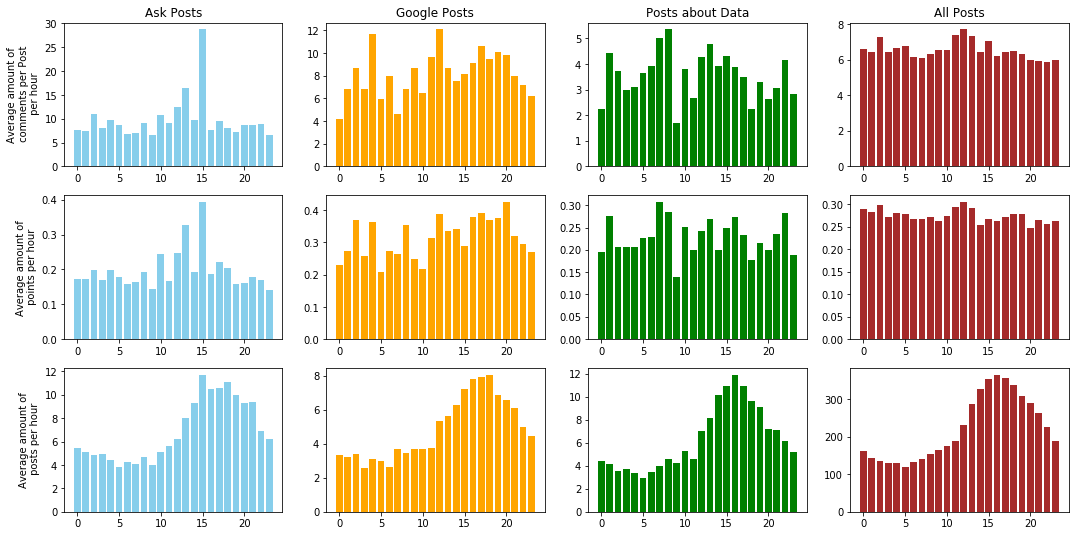

In [42]:
# plot average amount of comments by hour:

# convert sorted_hour to dataframe and sort by hour:
sorted_comments_hour_ask = sorted_avg(avg_comments_by_hour_ask)
sorted_comments_hour_data = sorted_avg(avg_comments_by_hour_data)
sorted_comments_hour_google = sorted_avg(avg_comments_by_hour_google)
sorted_comments_hour_all = sorted_avg(avg_comments_by_hour_all)


#convert counts_by_hour to dataframe and sort by hour :
sorted_count_hour_ask = sorted_count(ask_counts_by_hour)
sorted_count_hour_all = sorted_count(all_counts_by_hour)
sorted_count_hour_data = sorted_count(data_counts_by_hour)
sorted_count_hour_google = sorted_count(google_counts_by_hour)

#convert points by hour to dataframe and sort by hour:
sorted_points_hour_ask = sorted_avg(avg_points_by_hour_ask)
sorted_points_hour_all = sorted_avg(avg_points_by_hour_all)
sorted_points_hour_data = sorted_avg(avg_points_by_hour_data)
sorted_points_hour_google = sorted_avg(avg_points_by_hour_google)


#plot sorted by hour average amount comments for Ask HN posts
fig, ax = plt.subplots(3,4)
fig.set_size_inches(18, 9)

ax[0,0].bar(sorted_comments_hour_ask.iloc[:,0], sorted_comments_hour_ask.iloc[:,1], color = 'skyblue')
ax[0,0].set_title("Ask Posts")
ax[0,0].set_ylabel("Average amount of\n comments per Post\n per hour")
ax[0,1].bar(sorted_comments_hour_google.iloc[:,0], sorted_comments_hour_google.iloc[:,1], color = 'orange')
ax[0,1].set_title("Google Posts")
ax[0,2].bar(sorted_comments_hour_data.iloc[:,0], sorted_comments_hour_data.iloc[:,1],  color ='green')
ax[0,2].set_title("Posts about Data")
ax[0,3].bar(sorted_comments_hour_all.iloc[:,0], sorted_comments_hour_all.iloc[:,1], color = 'brown')
ax[0,3].set_title("All Posts")

ax[1,0].bar(sorted_points_hour_ask.iloc[:,0], sorted_points_hour_ask.iloc[:,1]/weeks, color = 'skyblue')
ax[1,0].set_ylabel("Average amount of\n points per hour")
ax[1,1].bar(sorted_points_hour_google.iloc[:,0], sorted_points_hour_google.iloc[:,1]/weeks, color = 'orange')
ax[1,2].bar(sorted_points_hour_data.iloc[:,0], sorted_points_hour_data.iloc[:,1]/weeks, color ='green')
ax[1,3].bar(sorted_points_hour_all.iloc[:,0], sorted_points_hour_all.iloc[:,1]/weeks, color = 'brown')

ax[2,0].bar(sorted_count_hour_ask.iloc[:,0], sorted_count_hour_ask.iloc[:,1]/weeks, color = 'skyblue')
ax[2,0].set_ylabel("Average amount of\n posts per hour")
ax[2,1].bar(sorted_count_hour_google.iloc[:,0], sorted_count_hour_google.iloc[:,1]/weeks, color = 'orange')
ax[2,2].bar(sorted_count_hour_data.iloc[:,0], sorted_count_hour_data.iloc[:,1]/weeks, color ='green')
ax[2,3].bar(sorted_count_hour_all.iloc[:,0], sorted_count_hour_all.iloc[:,1]/weeks, color = 'brown')


#### Conclusions about comments vs hour of the day:   
In general it is clear that for all posts fluctuations for average comments vs hours of a day are low. However, if to look separatelly by topics- fluctuations are bigger. It is difficult to say why exactly it happens, but most probably it is due to less datapoints for specific topics. 

#### Conclusions about points vs hour of the day:   
Graphs are very similar to graphs for average amount of comments, with slight difference. It is natural as users commenting and liking behaviour is similar. If one person have seen a post that he/she likes it is more probable that he/she will comment this post rather than the post that he/she didn't like, and vice versa.


#### Conclusions about average amount of posts vs hour of the day:  
Posting activity of users for all types of posts is increasing starting from 10:00 in the morning until approximatelly 17:00. Then it tends to go down. Pick posting activity is between 15:00 and 17:00.


<BarContainer object of 7 artists>

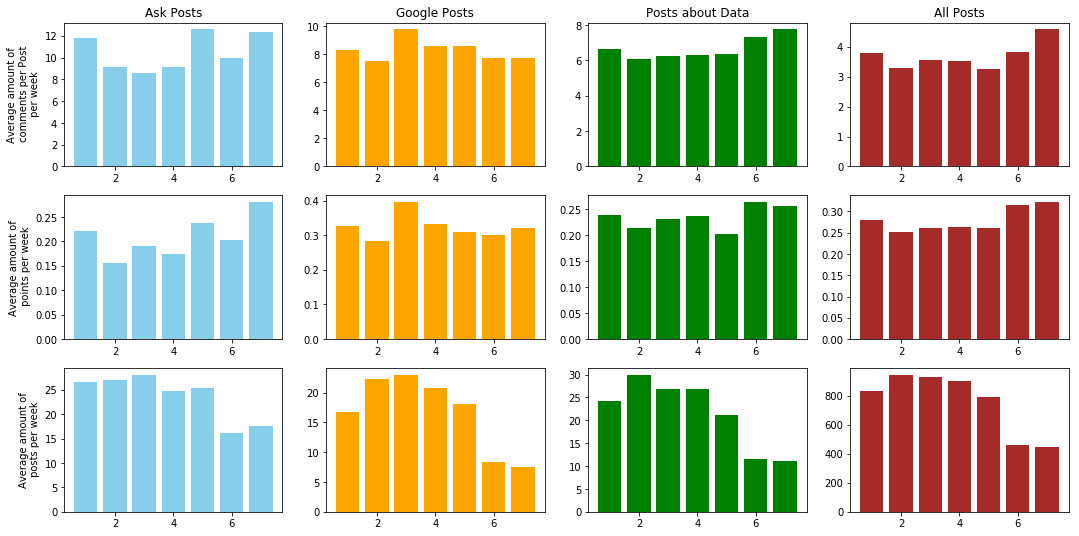

In [49]:
# plot average amount of comments by hour:

# convert sorted_day to dataframe and sort by day:
sorted_comments_day_ask = sorted_avg(avg_comments_by_day_ask)
sorted_comments_day_data = sorted_avg(avg_comments_by_day_all)
sorted_comments_day_all = sorted_avg(avg_comments_by_day_data)
sorted_comments_day_google = sorted_avg(avg_comments_by_day_google)

#convert counts_by_day to dataframe and sort by day :
sorted_count_day_ask = sorted_count(ask_counts_by_day)
sorted_count_day_all = sorted_count(all_counts_by_day)
sorted_count_day_data = sorted_count(data_counts_by_day)
sorted_count_day_google = sorted_count(google_counts_by_day)

#convert points by day to dataframe and sort by day:
sorted_points_day_ask = sorted_avg(avg_points_by_day_ask)
sorted_points_day_all = sorted_avg(avg_points_by_day_all)
sorted_points_day_data = sorted_avg(avg_points_by_day_data)
sorted_points_day_google = sorted_avg(avg_points_by_day_google)

#plot sorted by day average amount comments for Ask HN posts
fig, ax = plt.subplots(3, 4)
fig.set_size_inches(18, 9)

ax[0,0].bar(sorted_comments_day_ask.iloc[:,0], sorted_comments_day_ask.iloc[:,1], color = 'skyblue')
ax[0,0].set_title("Ask Posts")
ax[0,0].set_ylabel("Average amount of\n comments per Post\n per week")
ax[0,1].bar(sorted_comments_day_google.iloc[:,0], sorted_comments_day_google.iloc[:,1], color = 'orange')
ax[0,1].set_title("Google Posts")
ax[0,2].bar(sorted_comments_day_data.iloc[:,0], sorted_comments_day_data.iloc[:,1],  color ='green')
ax[0,2].set_title("Posts about Data")
ax[0,3].bar(sorted_comments_day_all.iloc[:,0], sorted_comments_day_all.iloc[:,1], color = 'brown')
ax[0,3].set_title("All Posts")

ax[1,0].bar(sorted_points_day_ask.iloc[:,0], sorted_points_day_ask.iloc[:,1]/weeks, color = 'skyblue')
ax[1,0].set_ylabel("Average amount of\n points per week")
ax[1,1].bar(sorted_points_day_google.iloc[:,0], sorted_points_day_google.iloc[:,1]/weeks, color = 'orange')
ax[1,2].bar(sorted_points_day_data.iloc[:,0], sorted_points_day_data.iloc[:,1]/weeks, color ='green')
ax[1,3].bar(sorted_points_day_all.iloc[:,0], sorted_points_day_all.iloc[:,1]/weeks, color = 'brown')


ax[2,0].bar(sorted_count_day_ask.iloc[:,0], sorted_count_day_ask.iloc[:,1]/weeks, color = 'skyblue')
ax[2,0].set_ylabel("Average amount of\n posts per week")
ax[2,1].bar(sorted_count_day_google.iloc[:,0], sorted_count_day_google.iloc[:,1]/weeks, color = 'orange')
ax[2,2].bar(sorted_count_day_data.iloc[:,0], sorted_count_day_data.iloc[:,1]/weeks, color ='green')
ax[2,3].bar(sorted_count_day_all.iloc[:,0], sorted_count_day_all.iloc[:,1]/weeks, color = 'brown')


#### Conclusions about comments and points vs hour of the day:   

In general users are more active in commenting and liking posts created on weekends and beginning of a week.
 
#### Conclusions about average amount of posts vs hour of the day:  
In general posting activity increases by middle of the week and drops by the end of the week. On the weekends for all types of posts activity is very low.

#### General conclusion: 

Even though users tend to post more in the middle of a week, according to statistics, posts created during weekends tend to recieve more comments. It is not surprising: as users are very active during middle of a week, posts created during weekends have more chances to be checked and commented than posts created in the middle of the week.


## Summary and Conclusions :

During the project it was discovered that:
1. Most common topics on Hacker News are:
    - 'Ask HN' and 'Show HN' posts
    - Posts about topics related to words: 'Data', 'Google', 'new', 'app', 'US', etc.
2. Most popular posts on Hacker News about topics related to words:
    - 'Died', 'Lee', 'GitLab', 'AlphaGo', 'Sorced', 'Rust', 'Arrested', etc.
3. Most commented posts on Hacker News about topics related to words:
     - 'Income' , 'Lee' , 'Hired' , 'Poverty', 'Hiring', 'Decline', 'AlphaGo', etc.
4. There is no difference in terms of average amount of comments and points for posts vs time of the day
5. Posting activity of users for all types of posts is increasing starting from 10:00 in the morning until 
approximatelly 17:00. Then it tends to go down. Pick posting activity is between 15:00 and 17:00.
6. In general users are more active in commenting and liking posts created on weekends and beginning of a week.
7. In general posting activity increases by middle of the week and drops by the end of the week. On the weekends 
for all types of posts activity is relatively low.